# Data Cleanup

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import DBSCAN, MiniBatchKMeans
from sklearn.preprocessing import StandardScaler


df_ev=pd.read_csv('Electric_Vehicle_Population_Data (2).csv')
df_charging=pd.read_csv('cleaned_alt_fuel_stations copy.csv')

In [6]:
df_ev

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,2T3YL4DV0E,King,Bellevue,WA,98005.0,2014,TOYOTA,RAV4,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,103.0,0.0,41.0,186450183,POINT (-122.1621 47.64441),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10
1,5YJ3E1EB6K,King,Bothell,WA,98011.0,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220.0,0.0,1.0,478093654,POINT (-122.20563 47.76144),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10
2,5UX43EU02S,Thurston,Olympia,WA,98502.0,2025,BMW,X5,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,40.0,0.0,35.0,274800718,POINT (-122.92333 47.03779),PUGET SOUND ENERGY INC,5.306701e+10
3,JTMAB3FV5R,Thurston,Olympia,WA,98513.0,2024,TOYOTA,RAV4 PRIME,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,42.0,0.0,2.0,260758165,POINT (-122.81754 46.98876),PUGET SOUND ENERGY INC,5.306701e+10
4,5YJYGDEE8M,Yakima,Selah,WA,98942.0,2021,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,15.0,236581355,POINT (-120.53145 46.65405),PACIFICORP,5.307700e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
232225,5YJ3E1EA3K,King,Renton,WA,98058.0,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220.0,0.0,47.0,262629839,POINT (-122.08747 47.4466),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
232226,1GKB0RDC1R,Snohomish,Snohomish,WA,98290.0,2024,GMC,HUMMER EV SUV,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,39.0,261119043,POINT (-122.09305 47.91265),PUGET SOUND ENERGY INC,5.306105e+10
232227,7SAYGDED3R,King,Redmond,WA,98033.0,2024,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,45.0,261726258,POINT (-122.2066 47.67887),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10
232228,JTMEB3FV5P,Chelan,Leavenworth,WA,98826.0,2023,TOYOTA,RAV4 PRIME,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,42.0,0.0,12.0,236639826,POINT (-120.65754 47.5982),PUD NO 1 OF CHELAN COUNTY,5.300796e+10


In [7]:
df_charging

,Fuel Type Code,Station Name,Street Address,City,State,ZIP,Latitude,Longitude,EV Connector Types
0,CNG,Arkansas Oklahoma Gas Corp,2100 S Waldron Rd,Fort Smith,AR,72903,35.362213,-94.375338,Unknown
1,CNG,Clean Energy - Logan International Airport,1000 Cottage St Ext,East Boston,MA,02128,42.374706,-71.026549,Unknown
2,CNG,Clean Energy - Everett - National Grid,16 Rover St,Everett,MA,02149,42.393167,-71.064352,Unknown
3,CNG,Clean Energy - Greenpoint - National Grid,287 Maspeth Ave,Brooklyn,NY,11211,40.718037,-73.932309,Unknown
4,CNG,Con Edison - Van Nest Service Center,1615 Bronxdale Ave,Bronx,NY,10462,40.844188,-73.861572,Unknown
...,...,...,...,...,...,...,...,...,...
93051,ELEC,325 Power St,325 Power St.,Penticton,BC,V2A 7K9,49.496004,-119.605061,CHADEMO J1772COMBO
93052,ELEC,Churned - Pride EV,6050 Dixie Rd,Mississauga,ON,L5T 1A6,43.655954,-79.649849,J1772COMBO
93053,ELEC,Riverside Apartments Inc.,187 Victoria St W,North Huron,ON,N0G,43.887629,-81.319362,J1772
93054,ELEC,CrossTown,844 Don Mills Rd,Toronto,ON,M3C 1V7,43.722138,-79.339775,J1772


In [8]:
df_ev = df_ev[df_ev['State'] == 'WA'].copy()
df_charging = df_charging[df_charging['State'] == 'WA'].copy()

In [10]:
df_charging["Fuel Type Code"].value_counts()

Fuel Type Code
ELEC    2480
LPG       51
RD        20
E85        6
CNG        4
BD         3
LNG        1
Name: count, dtype: int64

Base MSRP and Electric Range have a lot of values that are zero, we will impute them using Make+Model combination.

In [11]:
import re
import pandas as pd
from sklearn.impute import SimpleImputer

def extract_lat_lon(point_str):
    match = re.search(r'POINT \((-?\d+\.\d+) (-?\d+\.\d+)\)', str(point_str))
    return (float(match.group(2)), float(match.group(1))) if match else (None, None)

if 'Vehicle Location' in df_ev.columns:
    df_ev[['Latitude', 'Longitude']] = df_ev['Vehicle Location'].apply(lambda x: pd.Series(extract_lat_lon(x)))
    df_ev.drop(columns=['Vehicle Location'], inplace=True)


df_charging = df_charging[df_charging['Fuel Type Code']=='ELEC']


def impute_max(column):
    return df_ev.groupby("Make")[column].transform(
        lambda x: x.replace(0, x.max() if not x.dropna().empty else x.median()).fillna(x.max() if not x.dropna().empty else x.median())
    )

df_ev["Base MSRP"] = impute_max("Base MSRP")
df_ev["Electric Range"] = impute_max("Electric Range")
df_ev["Base MSRP"] = df_ev["Base MSRP"].replace(0, df_ev["Base MSRP"].median())
df_ev["Electric Range"] = df_ev["Electric Range"].replace(0, df_ev["Electric Range"].median())
df_ev = df_ev.dropna(subset=['Latitude', 'Longitude', 'Electric Range'])
print(df_ev["Base MSRP"].describe())
print(df_ev["Electric Range"].describe())


count    231742.000000
mean      87920.506468
std       64350.877880
min       31950.000000
25%       64950.000000
50%       64950.000000
75%      110950.000000
max      845000.000000
Name: Base MSRP, dtype: float64
count    231742.000000
mean        202.384656
std         121.518899
min           6.000000
25%          83.000000
50%         220.000000
75%         337.000000
max         337.000000
Name: Electric Range, dtype: float64


In [12]:
df=df_ev.copy()

In [13]:
df_ev.describe()

,Postal Code,Model Year,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,2020 Census Tract,Latitude,Longitude
count,231742.000000,231742.000000,231742.000000,231742.000000,231742.000000,2.317420e+05,2.317420e+05,231742.000000,231742.000000
mean,98269.271466,2021.354864,202.384656,87920.506468,28.881277,2.343859e+08,5.304008e+10,47.458364,-122.063258
std,310.593445,2.995178,121.518899,64350.877880,14.904629,6.831966e+07,1.643804e+07,0.619013,1.054128
min,98001.000000,1999.000000,6.000000,31950.000000,1.000000,4.385000e+03,5.300195e+10,45.579230,-124.627350
25%,98052.000000,2020.000000,83.000000,64950.000000,17.000000,2.034983e+08,5.303301e+10,47.328000,-122.401990
50%,98126.000000,2023.000000,220.000000,64950.000000,32.000000,2.512821e+08,5.303303e+10,47.603570,-122.291790
75%,98375.000000,2023.000000,337.000000,110950.000000,42.000000,2.687079e+08,5.305307e+10,47.722380,-122.131580
max,99403.000000,2025.000000,337.000000,845000.000000,49.000000,4.792548e+08,5.307794e+10,48.999760,-117.043980


In [14]:
df_ev.info()

<class 'pandas.core.frame.DataFrame'>
Index: 231742 entries, 0 to 232229
Data columns (total 18 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         231742 non-null  object 
 1   County                                             231742 non-null  object 
 2   City                                               231742 non-null  object 
 3   State                                              231742 non-null  object 
 4   Postal Code                                        231742 non-null  float64
 5   Model Year                                         231742 non-null  int64  
 6   Make                                               231742 non-null  object 
 7   Model                                              231742 non-null  object 
 8   Electric Vehicle Type                              231742 non-null  object 
 9 

# Customer Segmentation

To better understand EV Adoption trends, we perform clustering to define different segments in the EV industry

## K-ProtoType Clustering

As the data contains a mix of categorical and numerical variables, we first try using K-ProtoType Clustering

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.cluster import DBSCAN, MiniBatchKMeans
from kmodes.kprototypes import KPrototypes


In [16]:
!pip install kmodes

In [17]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from kmodes.kprototypes import KPrototypes

num_features = ["Electric Range", "Base MSRP", "Model Year"]
cat_features = ["Make", "Model", "Electric Vehicle Type"]

print("Shape before dropna:", df.shape)

df = df[num_features + cat_features].dropna()

print("Shape after dropna:", df.shape)

scaler = StandardScaler()
scaled_num_data = scaler.fit_transform(df[num_features])
cat_encoded = df[cat_features].apply(lambda x: x.astype('category').cat.codes)
final_data = np.concatenate((scaled_num_data, cat_encoded.values), axis=1)

Shape before dropna: (231742, 18)
Shape after dropna: (231742, 6)


Elbow method for K-Prototypes: 100%|██████████| 8/8 [12:34<00:00, 94.31s/it] 


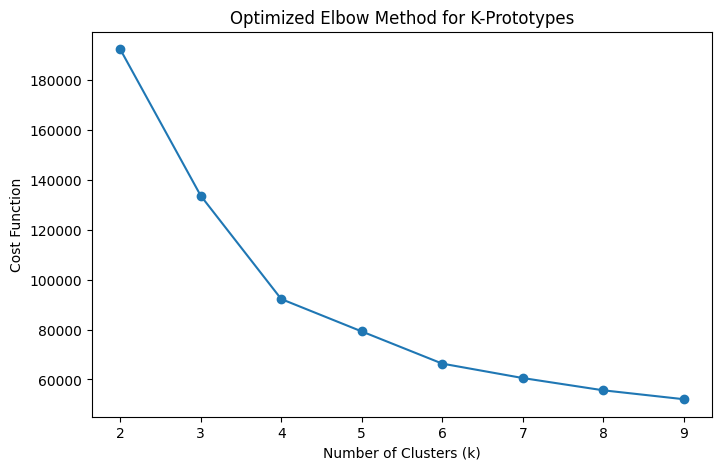

In [18]:
sample_size = int(0.3 * final_data.shape[0])
sampled_data = final_data[np.random.choice(final_data.shape[0], sample_size, replace=False)]

cost = []
K_range = range(2, 10)  

for k in tqdm(K_range, desc="Elbow method for K-Prototypes"):
    kproto = KPrototypes(n_clusters=k, random_state=42, n_jobs=-1, max_iter=30)
    kproto.fit(sampled_data, categorical=[3, 4, 5])
    cost.append(kproto.cost_)

plt.figure(figsize=(8, 5))
plt.plot(K_range, cost, marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Cost Function")
plt.title("Optimized Elbow Method for K-Prototypes")
plt.show()

We see an elbow point at k=4 so we choose it as our optimal no of clusters

In [39]:
!pip3 install kmodes

After using Elbow method, 4 seems to be the optimum no of clusters based on the cost function

In [40]:
optimal_k = 4  
kproto = KPrototypes(n_clusters=optimal_k, random_state=42)

clusters = kproto.fit_predict(final_data, categorical=[3, 4, 5]) 
df["KPrototypes_Cluster"] = clusters
df.head()

,Electric Range,Base MSRP,Model Year,Make,Model,Electric Vehicle Type,KPrototypes_Cluster
0,21.0,64950.0,2023,JEEP,WRANGLER,Plug-in Hybrid Electric Vehicle (PHEV),0
1,238.0,64950.0,2019,CHEVROLET,BOLT EV,Battery Electric Vehicle (BEV),1
2,81.0,91250.0,2015,BMW,I3,Battery Electric Vehicle (BEV),1
3,220.0,110950.0,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),1
4,208.0,110950.0,2015,TESLA,MODEL S,Battery Electric Vehicle (BEV),1


In [41]:
cluster_summary = df.groupby("KPrototypes_Cluster").agg({
    "Electric Range": ["mean", "min", "max"],
    "Base MSRP": ["mean", "min", "max"],
    "Model Year": lambda x: x.value_counts().index[0],
    "Make": lambda x: x.value_counts().index[0],  
    "Model": lambda x: x.value_counts().index[0], 
    "Electric Vehicle Type": lambda x: x.value_counts().index[0]  
}).reset_index()

cluster_summary

KPrototypes_Cluster Electric Range                    Base MSRP            \
                                mean    min    max           mean       min   
0                   0      59.333600    6.0  153.0   63716.717468   33950.0   
1                   1     131.779528    6.0  337.0   79353.306201   31950.0   
2                   2     303.306842  215.0  337.0   94706.677308   33950.0   
3                   3     177.273269   12.0  308.0  845000.000000  845000.0   

            Model Year     Make           Model  \
        max   <lambda> <lambda>        <lambda>   
0  102000.0       2023     FORD  MUSTANG MACH-E   
1  184400.0       2018    TESLA            LEAF   
2  110950.0       2023    TESLA         MODEL Y   
3  845000.0       2022  PORSCHE          TAYCAN   

                    Electric Vehicle Type  
                                 <lambda>  
0  Plug-in Hybrid Electric Vehicle (PHEV)  
1          Battery Electric Vehicle (BEV)  
2          Battery Electric Vehicle (BEV)  
3          Battery Electric Vehicle (BEV)

All the 4 clusters have different Make and Model combinations as their most frequent. 

Clusters 0 and 2 have Battery Electric vehicle as their most frequent EV type and Cluster 1 and 3 have Hybrid as the most frequent type

Cluster 0 has the highest Electric range , indicated by Tesla as the most frequent type

In [42]:
!pip3 install ace_tools

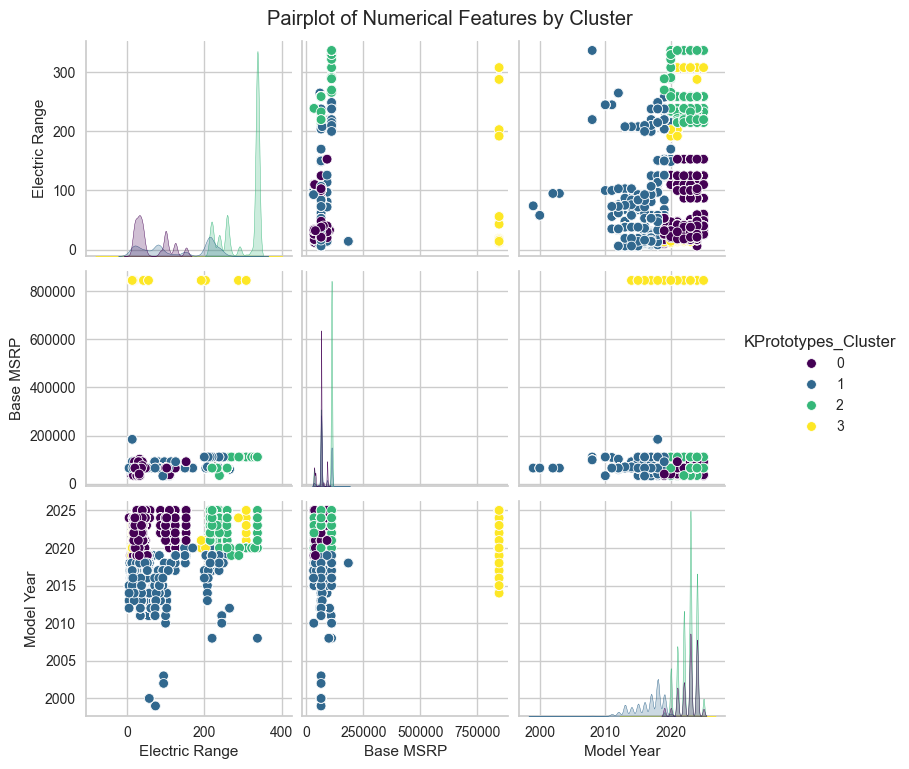

In [67]:
num_features = ["Electric Range", "Base MSRP", "Model Year"]
sns.pairplot(df, vars=num_features, hue="KPrototypes_Cluster", palette="viridis", diag_kind="kde")
plt.suptitle("Pairplot of Numerical Features by Cluster", y=1.02)
plt.show()

Points in Cluster 3 have much higher MSRP than other clusters
Clusters 1 & 2 seperate easily on the basis of model year, with newer models belonging to Cluster 2

/var/folders/41/fn2nh3311kv7rct8106znjt40000gn/T/ipykernel_2976/1331591492.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=x, order=top10, **kwargs)
/var/folders/41/fn2nh3311kv7rct8106znjt40000gn/T/ipykernel_2976/1331591492.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=x, order=top10, **kwargs)
/var/folders/41/fn2nh3311kv7rct8106znjt40000gn/T/ipykernel_2976/1331591492.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=x, order=top10, **kwargs)
/var/folders/41/fn2nh3311kv7rct8106znjt4

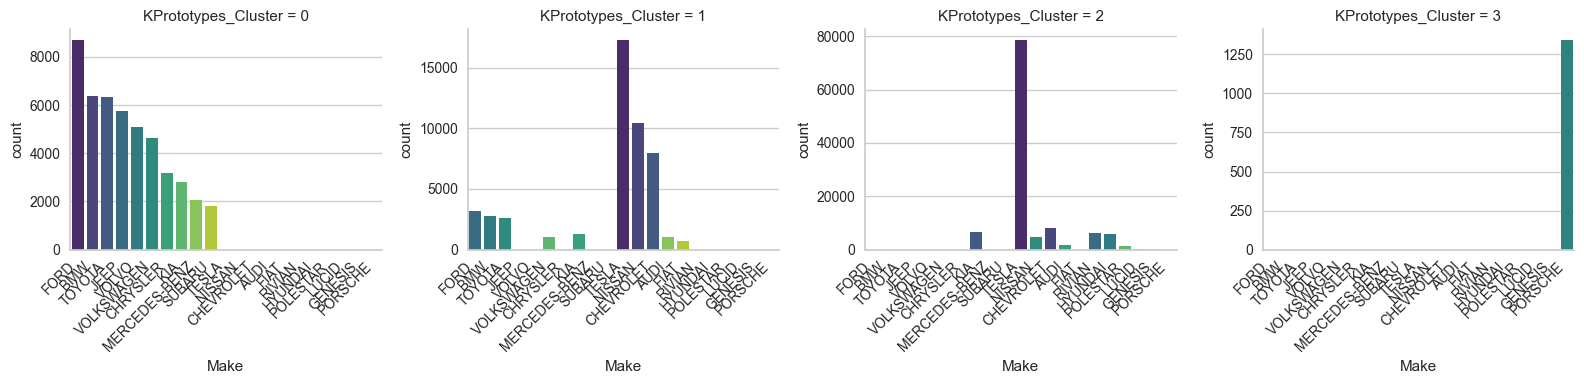

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


def custom_countplot_top10makes(data, x, **kwargs):
    top10 = data[x].value_counts().head(10).index
    data = data[data[x].isin(top10)]
    sns.countplot(data=data, x=x, order=top10, **kwargs)

g = sns.FacetGrid(df, col="KPrototypes_Cluster", col_wrap=4, sharey=False, height=4)

g.map_dataframe(
    custom_countplot_top10makes,
    x="Make",hue='Make'  
    palette="viridis"
)

for ax in g.axes.flat:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")

plt.tight_layout()
plt.show()

These four bar charts show how the K-Prototypes algorithm segments vehicle makes into distinct groups, highlighting differences in brand distribution across clusters. Notice that some makes dominate specific clusters, suggesting shared attributes or market positioning within each group.

## K-Means

In [47]:
features = ["Electric Range", "Base MSRP", "Model Year"] 
ev_cluster_data = df[features] 

scaler= StandardScaler()
scaled_data = scaler.fit_transform(ev_cluster_data)

Not taking Longitude, latitude as features as we want to segment the type of EV's sold 

In [48]:
scaled_data

array([[-1.48758865, -0.35728408,  0.58010294],
       [ 0.29801405, -0.35728408, -0.75773034],
       [-0.99387362,  0.05232903, -2.09556362],
       ...,
       [-1.05970229, -0.35728408, -3.4333969 ],
       [ 1.11264386,  0.35914949,  0.91456126],
       [-0.62358735,  0.05232903, -0.75773034]])

In [49]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
pca_data = pca.fit_transform(scaled_data)

df_pca = pd.DataFrame(pca_data, columns=["PCA1", "PCA2","PCA3"])
df_pca["Make"] = df["Make"] 

print("Explained Variance Ratio:", pca.explained_variance_ratio_)

Explained Variance Ratio: [0.47531288 0.32499383 0.19969329]


Cumulative Explained variance for top 2 PCA components is 78% which is less than our threshold

Text(0.5, 1.0, 'Silhouette Score Method (Optimized)')

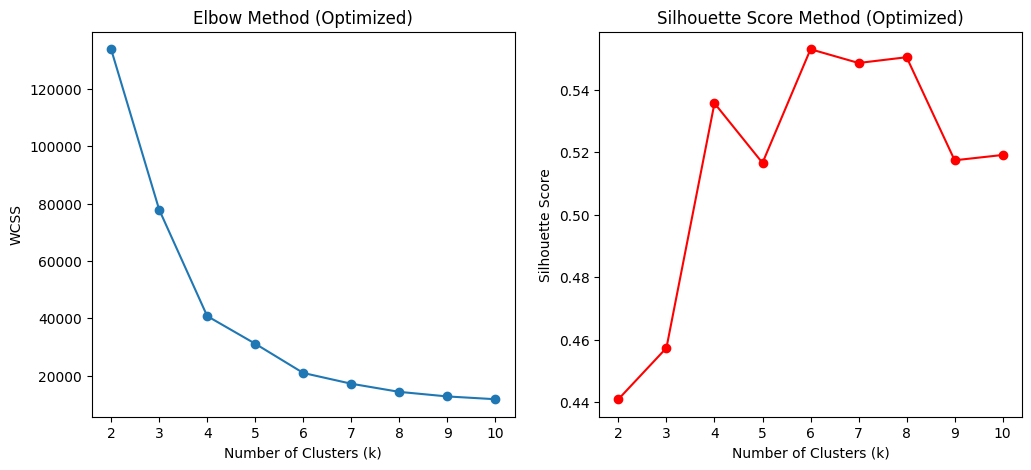

In [50]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

sample_fraction = 0.3  
sample_size = int(sample_fraction * scaled_data.shape[0])

sampled_data = scaled_data[np.random.choice(scaled_data.shape[0], sample_size, replace=False), :]

wcss = []  
silhouette_scores = []
K_range = range(2, 11) 

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(sampled_data) 
    wcss.append(kmeans.inertia_)  
    silhouette_scores.append(silhouette_score(sampled_data, kmeans.labels_))  


plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(K_range, wcss, marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("WCSS")
plt.title("Elbow Method (Optimized)")


plt.subplot(1, 2, 2)
plt.plot(K_range, silhouette_scores, marker='o', color='red')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score Method (Optimized)")

Elbow plot shows a huge drop in error at k=4 which aligns with the local maxima of silhouette score

In [51]:
optimal_k = 4  
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df["KMeans_Cluster"] = kmeans.fit_predict(scaled_data)

df[["Electric Range", "Base MSRP", "Model Year", "KMeans_Cluster"]].head()

,Electric Range,Base MSRP,Model Year,KMeans_Cluster
0,21.0,64950.0,2023,1
1,238.0,64950.0,2019,0
2,81.0,91250.0,2015,0
3,220.0,110950.0,2019,0
4,208.0,110950.0,2015,0


In [65]:
import pandas as pd

df[num_features]=scaler.inverse_transform(df[num_features])
df_clustered = df.copy()
df_clustered["Cluster"] = kmeans.labels_

cluster_summary = df_clustered.groupby("Cluster").agg({
    "Electric Range": ["mean", "min", "max"],
    "Base MSRP": ["mean", "min", "max"],
    "Model Year": ["mean", "min", "max"],
    "Make": lambda x: x.value_counts().idxmax(), 
    "Model": lambda x: x.value_counts().idxmax(), 
    "Electric Vehicle Type": lambda x: x.value_counts().idxmax() 
}).reset_index()

cluster_summary

Cluster Electric Range                    Base MSRP                      \
                    mean    min    max           mean       min       max   
0       0     127.373784    6.0  337.0   78630.657663   31950.0  184400.0   
1       1      60.448532    6.0  153.0   63970.854614   33950.0  102000.0   
2       2     177.273269   12.0  308.0  845000.000000  845000.0  845000.0   
3       3     303.032281  215.0  337.0   94608.111856   33950.0  110950.0   

    Model Year                     Make           Model  \
          mean     min     max <lambda>        <lambda>   
0  2016.654421  1999.0  2020.0    TESLA            LEAF   
1  2022.901311  2020.0  2025.0     FORD  MUSTANG MACH-E   
2  2020.956069  2014.0  2025.0  PORSCHE          TAYCAN   
3  2022.610504  2019.0  2025.0    TESLA         MODEL Y   

                    Electric Vehicle Type  
                                 <lambda>  
0          Battery Electric Vehicle (BEV)  
1  Plug-in Hybrid Electric Vehicle (PHEV)  
2          Battery Electric Vehicle (BEV)  
3          Battery Electric Vehicle (BEV)

Cars in Cluster 3 have the highest Range and most of the vehicles in this cluster are Battery electric Vehicle's. Cluster 2 has just 1 Car that is Porsche Taycan with an exceptionally high price

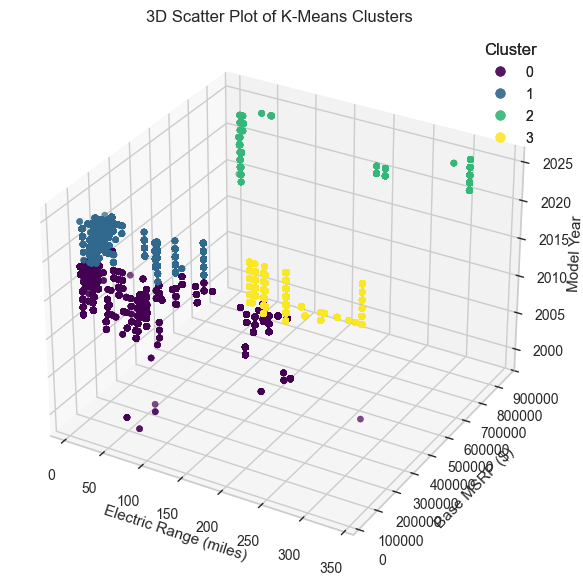

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(df_clustered["Electric Range"], 
                     df_clustered["Base MSRP"], 
                     df_clustered["Model Year"], 
                     c=df_clustered["Cluster"], cmap="viridis", alpha=0.7)

ax.set_xlabel("Electric Range (miles)")
ax.set_ylabel("Base MSRP ($)")
ax.set_zlabel("Model Year")
ax.set_title("3D Scatter Plot of K-Means Clusters")

legend1 = ax.legend(*scatter.legend_elements(), title="Cluster")
ax.add_artist(legend1)

plt.show()

This 3D scatter plot groups vehicles into distinct K-Means clusters based on model year, electric range, and price. Notice how older, lower-range vehicles tend to cluster separately from newer, higher-range (and often more expensive) models, revealing clear market segments.

/var/folders/41/fn2nh3311kv7rct8106znjt40000gn/T/ipykernel_2976/3057127379.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_clustered, x="Cluster", y="Base MSRP", palette="viridis")
/var/folders/41/fn2nh3311kv7rct8106znjt40000gn/T/ipykernel_2976/3057127379.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_clustered, x="Cluster", y="Electric Range", palette="magma")


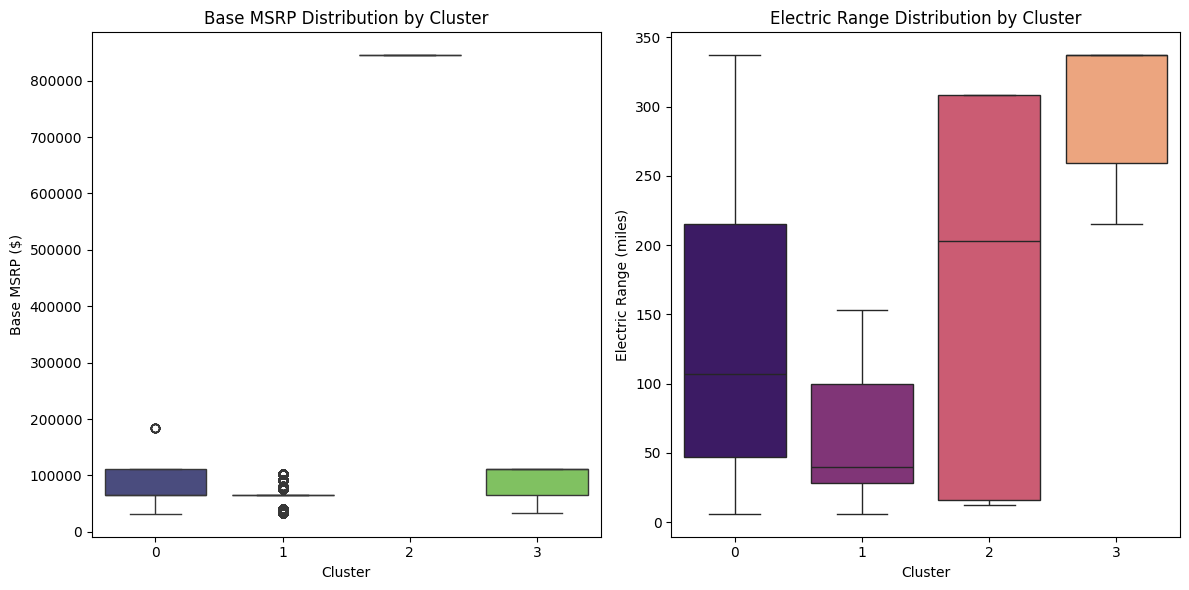

In [54]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.boxplot(data=df_clustered, x="Cluster", y="Base MSRP", palette="viridis")
plt.title("Base MSRP Distribution by Cluster")
plt.xlabel("Cluster")
plt.ylabel("Base MSRP ($)")

plt.subplot(1, 2, 2)
sns.boxplot(data=df_clustered, x="Cluster", y="Electric Range", palette="magma")
plt.title("Electric Range Distribution by Cluster")
plt.xlabel("Cluster")
plt.ylabel("Electric Range (miles)")

plt.tight_layout()
plt.show()

In [55]:
!pip3 install yellowbrick

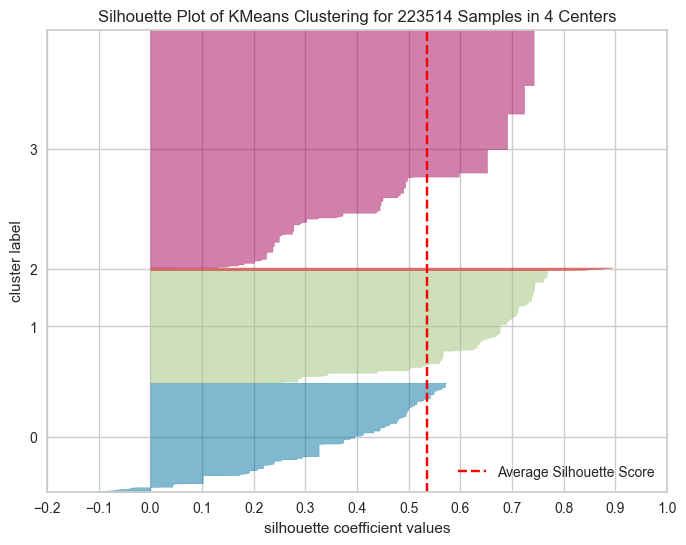

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 223514 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [56]:
import matplotlib.pyplot as plt
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.cluster import KMeans

optimal_k = 4  

fig, ax = plt.subplots(figsize=(8, 6))

kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick', ax=ax)

visualizer.fit(scaled_data) 
visualizer.show()

Average Silhoutte score of 0.55 with clusters 1 and 2 having a large ratio of their points above this value. Cluster 0 is very poorly formed. 

In [57]:
!pip3 install --upgrade setuptools
!pip3 install yellowbrick

# Location Based Clustering

In [69]:
!pip3 install yellowbrick

3486.90s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


In [70]:
!pip3 install geopandas

3492.55s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


usa = gpd.read_file("https://naturalearth.s3.amazonaws.com/110m_cultural/ne_110m_admin_0_countries.zip")
usa = usa[usa["ADMIN"] == "United States of America"]  # Filter for the USA


## DBSCAN 

In [71]:
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.cluster import DBSCAN, MiniBatchKMeans
from kmodes.kprototypes import KPrototypes


🔢 Transforming Features...


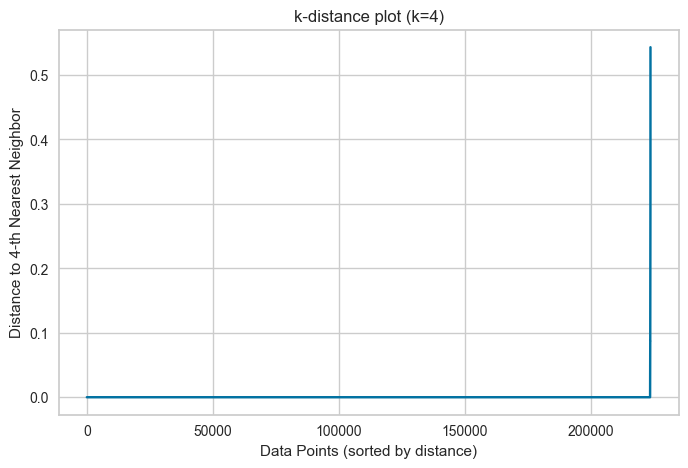

In [72]:
print("🔢 Transforming Features...")

numerical_features = ['Latitude', 'Longitude']

scaler = StandardScaler()
df_ev[numerical_features] = scaler.fit_transform(df_ev[numerical_features])

final_feature_matrix = df_ev[numerical_features]
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors

k = 4


neighbors = NearestNeighbors(n_neighbors=k)
neighbors.fit(final_feature_matrix)
distances, indices = neighbors.kneighbors(final_feature_matrix)
kth_distances = np.sort(distances[:, k-1])

plt.figure(figsize=(8, 5))
plt.plot(kth_distances)
plt.title(f"k-distance plot (k={k})")
plt.xlabel("Data Points (sorted by distance)")
plt.ylabel(f"Distance to {k}-th Nearest Neighbor")
plt.show()



nearly flat zero except for some outlier points signifying that the many points are close ( high adoption in City of Seattle). 

🚗 Running DBSCAN Clustering in Batches...


🔄 Running DBSCAN in Batches: 100%|██████████| 45/45 [00:02<00:00, 17.53it/s]


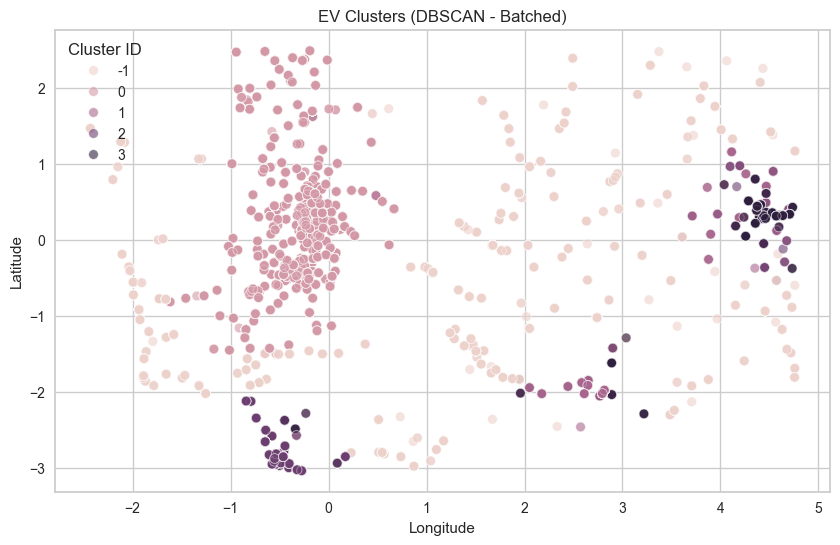

In [73]:
print("Running DBSCAN Clustering in Batches...")
df_ev['Cluster_DBSCAN'] = -1 
dbscan = DBSCAN(eps=0.5, min_samples=100)

batch_size = 5000
for i in tqdm(range(0, len(df_ev), batch_size), desc="🔄 Running DBSCAN in Batches"):
    batch_data = df_ev.iloc[i:i + batch_size][numerical_features].values
    df_ev.iloc[i:i + batch_size, df_ev.columns.get_loc('Cluster_DBSCAN')] = dbscan.fit_predict(batch_data)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_ev['Longitude'], y=df_ev['Latitude'], hue=df_ev['Cluster_DBSCAN'], alpha=0.6)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("EV Clusters (DBSCAN - Batched)")
plt.legend(title="Cluster ID")
plt.show()


DBSCAN merged large areas into a single cluster and labeled many points as noise.

In [74]:
!pip3 install hdbscan

3505.39s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


In [75]:
!pip3.12 install --upgrade pip


3511.00s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


## Hbdscan Clustering


In [76]:
import hdbscan


🚀 Running HDBSCAN Clustering...


3523.92s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
3523.92s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
3523.93s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
3523.93s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
0.00s - Debugger warning: It seems that frozen modules are being used, which may
0.00s - Debugger warning: It seems that frozen modules are being used, which may
0.00s - make the debugger miss breakpoints. Please pass -Xfrozen_modules=off
0.00s - make the debugger miss breakpoints. Please pass -Xfrozen_modules=off
0.00s - to python to disable frozen modules.
0.00s - Note: Debugging will proceed. Set PYDEVD_DISABLE_FILE_VALIDATION=1 to disable this validation.
0.00s - Debugger warning: It seems that frozen modules are being used, which may
0.00s - to python to disable frozen modules.
0.00s - make the debugger miss

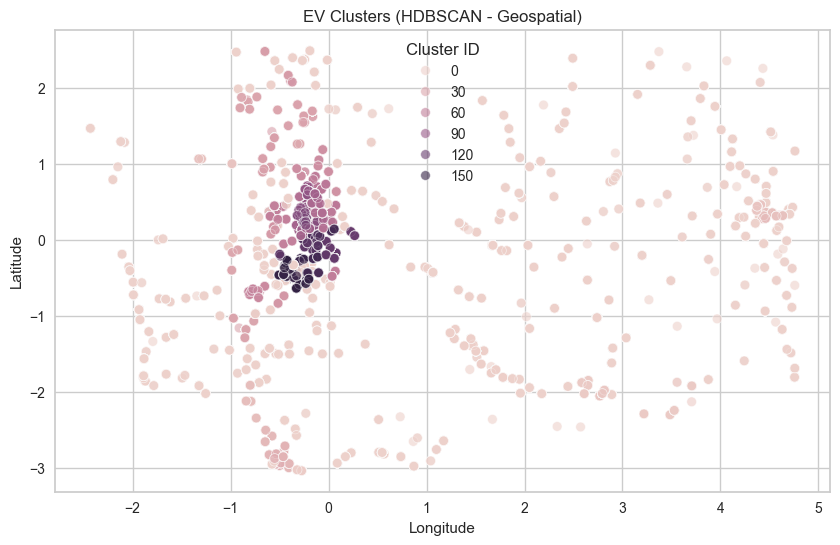

In [77]:
df_ev = df_ev.dropna(subset=["Latitude", "Longitude"])
numerical_features = ['Latitude', 'Longitude']
df_ev[['Latitude', 'Longitude']] = np.radians(df_ev[['Latitude', 'Longitude']])
print("Running HDBSCAN Clustering...")
hdbscan_clusterer = hdbscan.HDBSCAN(min_cluster_size=500, metric='haversine')
df_ev['Cluster_HDBSCAN'] = hdbscan_clusterer.fit_predict(df_ev[['Latitude', 'Longitude']])
df_ev[['Latitude', 'Longitude']] = np.degrees(df_ev[['Latitude', 'Longitude']])

plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_ev['Longitude'], y=df_ev['Latitude'], 
                hue=df_ev['Cluster_HDBSCAN'], alpha=0.6)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("EV Clusters (HDBSCAN - Geospatial)")
plt.legend(title="Cluster ID")
plt.show()



HDBSCAN yielded multiple localized clusters (particularly in urban hotspots) and automatically flagged sparse regions as noise.
 


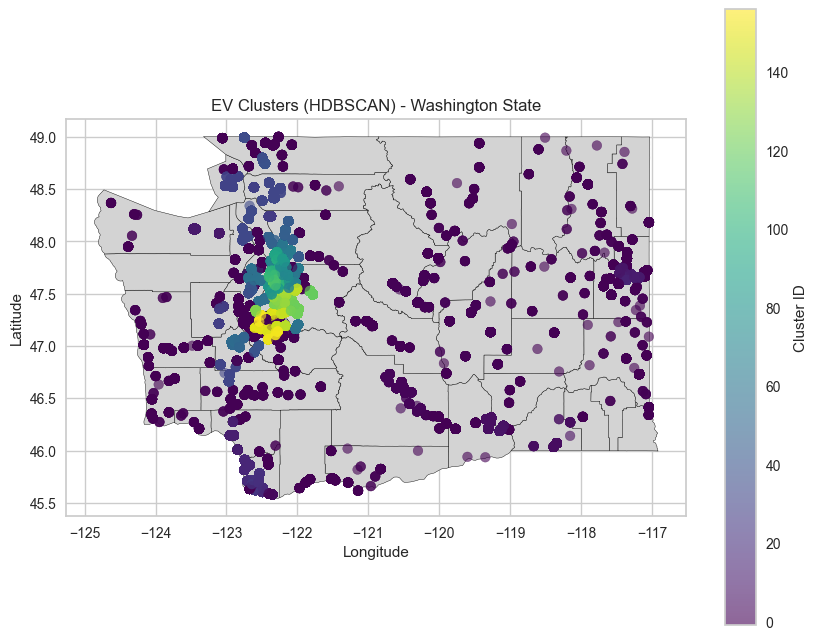

In [78]:
import geopandas as gpd
import matplotlib.pyplot as plt

wa_url = "https://gis.dnr.wa.gov/site3/rest/services/Public_Boundaries/WADNR_PUBLIC_Cadastre_OpenData/FeatureServer/11/query?where=1%3D1&outFields=*&outSR=4326&f=json"
wa = gpd.read_file(wa_url)
df_ev[numerical_features] = scaler.inverse_transform(df_ev[numerical_features])
fig, ax = plt.subplots(figsize=(10, 8))
wa.plot(ax=ax, color='lightgrey', edgecolor='black')

scatter = ax.scatter(
    df_ev['Longitude'],
    df_ev['Latitude'],
    c=df_ev['Cluster_HDBSCAN'],
    cmap='viridis',
    alpha=0.6
)

plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("EV Clusters (HDBSCAN) - Washington State")
plt.colorbar(scatter, label="Cluster ID")
plt.show()

This map shows HDBSCAN-identified clusters of EV data points across Washington State, color-coded by cluster ID. Notice the high-density cluster around the Seattle area, suggesting a concentration of EV usage or infrastructure, while smaller clusters appear throughout the rest of the state.

# GeoSpatial Analysis

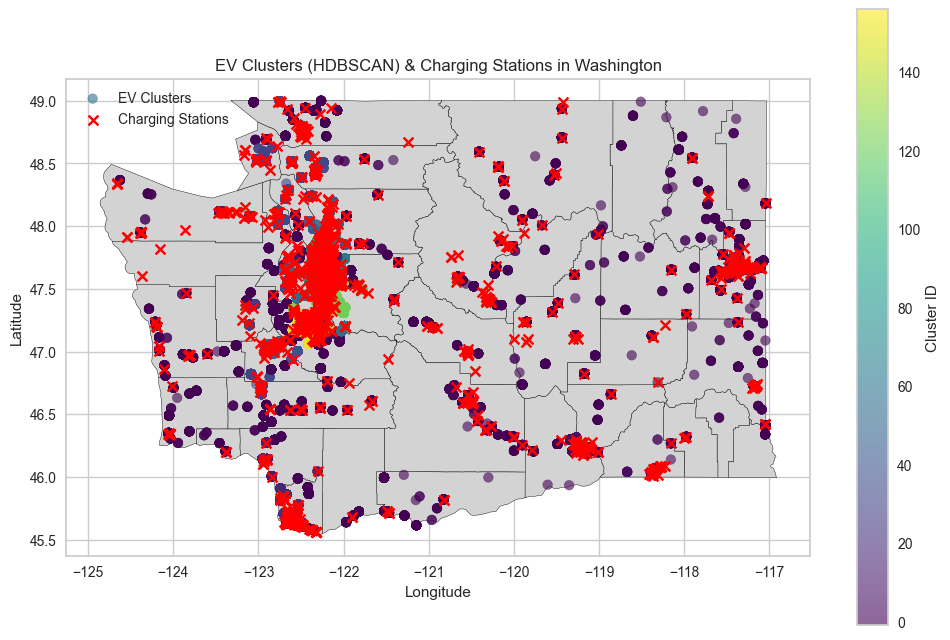

In [79]:
import matplotlib.pyplot as plt
import geopandas as gpd
import seaborn as sns

wa_url = "https://gis.dnr.wa.gov/site3/rest/services/Public_Boundaries/WADNR_PUBLIC_Cadastre_OpenData/FeatureServer/11/query?where=1%3D1&outFields=*&outSR=4326&f=json"
wa = gpd.read_file(wa_url)
fig, ax = plt.subplots(figsize=(12, 8))
wa.plot(ax=ax, color='lightgrey', edgecolor='black')

scatter = ax.scatter(
    df_ev['Longitude'],
    df_ev['Latitude'],
    c=df_ev['Cluster_HDBSCAN'],
    cmap='viridis',
    alpha=0.6,
    label='EV Clusters'
)
cbar = plt.colorbar(scatter, ax=ax)
cbar.set_label("Cluster ID")
ax.scatter(
    df_charging['Longitude'],
    df_charging['Latitude'],
    color='red',
    marker='x',
    s=50,
    label='Charging Stations'
)

plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("EV Clusters (HDBSCAN) & Charging Stations in Washington")
plt.legend()
plt.show()

From this plot, we can see how the charging infrastructure is concentrated majorly in urban centers and penetration is significantly lower. 

In [80]:
!pip install osmnx

3565.86s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 28.2 MB/s eta 0:00:00


In [81]:
df_charging

,Fuel Type Code,Station Name,Street Address,City,State,ZIP,Latitude,Longitude,EV Connector Types
1144,ELEC,City of Lacey - City Hall Parking,420 College St,Lacey,WA,98503,47.044011,-122.822404,J1772
1194,ELEC,Seattle-Tacoma International Airport - General...,17801 Pacific Hwy S,Seattle,WA,98188,47.443377,-122.296229,J1772
1444,ELEC,Avista Corp,1411 E Mission Ave,Spokane,WA,99252,47.673347,-117.388933,J1772 NEMA520
1445,ELEC,Steam Plant Parking,130 S Post St,Spokane,WA,99201,47.655792,-117.423664,J1772
1679,ELEC,KING COUNTY DES ISSAQUAH P&R 2,1755 Highlands Dr NE,Issaquah,WA,98027,47.545324,-122.019500,J1772
...,...,...,...,...,...,...,...,...,...
93000,ELEC,NORAM FACEBOOK SEA #4,1101 Dexter Ave N,Seattle,WA,98109,47.628500,-122.342944,J1772
93001,ELEC,NORAM FACEBOOK SEA #3,1101 Dexter Ave N,Seattle,WA,98109,47.628558,-122.342944,J1772
93002,ELEC,NORAM FACEBOOK SEA #2,1101 Dexter Ave N,Seattle,WA,98109,47.628616,-122.342933,J1772
93003,ELEC,NORAM FACEBOOK SEA 5,1101 Dexter Ave N,Seattle,WA,98109,47.628639,-122.342659,J1772


In [82]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd

cluster_centroids = df_ev.groupby('Cluster_HDBSCAN')[['Latitude', 'Longitude']].mean().reset_index()
cluster_centroids.columns = ['Cluster', 'Lat_centroid', 'Lon_centroid']

def find_nearest_cluster(row):
    dists = ((cluster_centroids['Lat_centroid'] - row['Latitude'])**2 + 
             (cluster_centroids['Lon_centroid'] - row['Longitude'])**2)**0.5
    return cluster_centroids.loc[dists.idxmin(), 'Cluster']

df_charging['NearestCluster'] = df_charging.apply(find_nearest_cluster, axis=1)

stations_per_cluster = df_charging.groupby('NearestCluster').size().reset_index(name='StationCount')

cluster_info = pd.merge(cluster_centroids, stations_per_cluster, left_on='Cluster', right_on='NearestCluster', how='left')
cluster_info.drop(columns='NearestCluster', inplace=True)
cluster_info['StationCount'].fillna(0, inplace=True)

/var/folders/41/fn2nh3311kv7rct8106znjt40000gn/T/ipykernel_2976/1842160339.py:26: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  cluster_info['StationCount'].fillna(0, inplace=True)  # If no stations matched


In [83]:
df_ev = df_ev[df_ev['Cluster_HDBSCAN'] != -1].copy()

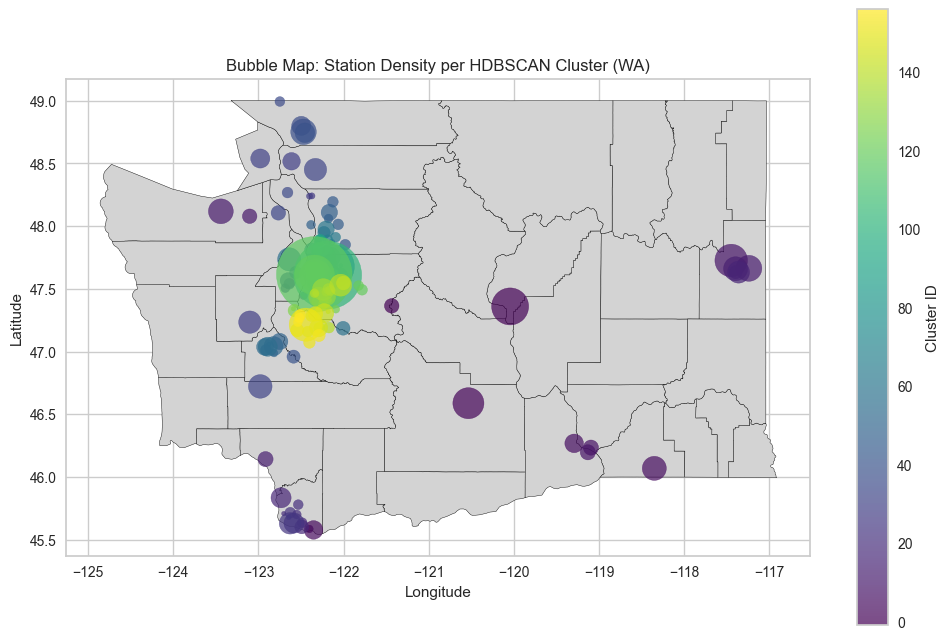

In [84]:
wa = gpd.read_file(wa_url)

fig, ax = plt.subplots(figsize=(12, 8))
wa.plot(ax=ax, color='lightgrey', edgecolor='black')

scatter = ax.scatter(
    cluster_info['Lon_centroid'],
    cluster_info['Lat_centroid'],
    s=cluster_info['StationCount'] * 10, 
    c=cluster_info['Cluster'],
    cmap='viridis',
    alpha=0.7,
    label='Cluster Centroids'
)

plt.colorbar(scatter, label='Cluster ID')
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Bubble Map: Station Density per HDBSCAN Cluster (WA)")
plt.show()

This plot identifies clusters which have very low charging density per cluster,Flagging regions for further action

In [133]:
import geopandas as gpd
import matplotlib.pyplot as plt

roads_path = "tl_2024_us_primaryroads (1).shp" 

wa_roads = gpd.read_file(roads_path)
print(wa_roads.crs) 
print(wa_roads.head())


EPSG:4269
        LINEARID       FULLNAME RTTYP  MTFCC  \
0  1104430641961   State Hwy 42     S  S1100   
1  1104430639695   State Hwy 42     S  S1100   
2  1108296451323   State Hwy 67     S  S1100   
3  1108296451337   State Hwy 67     S  S1100   
4  1109097223374  State Hwy 114     S  S1100   

                                            geometry  
0  LINESTRING (-89.34466 31.35903, -89.34374 31.3...  
1  LINESTRING (-89.32506 31.37999, -89.32826 31.3...  
2  LINESTRING (-88.49978 43.14901, -88.49788 43.1...  
3  LINESTRING (-88.49978 43.14878, -88.4982 43.14...  
4  LINESTRING (-97.03217 32.92924, -97.03059 32.9...  


In [137]:
minx, maxx = -125, -116
miny, maxy = 45.5, 49.5
wa_roads_wa = wa_roads.cx[minx:maxx, miny:maxy].copy()

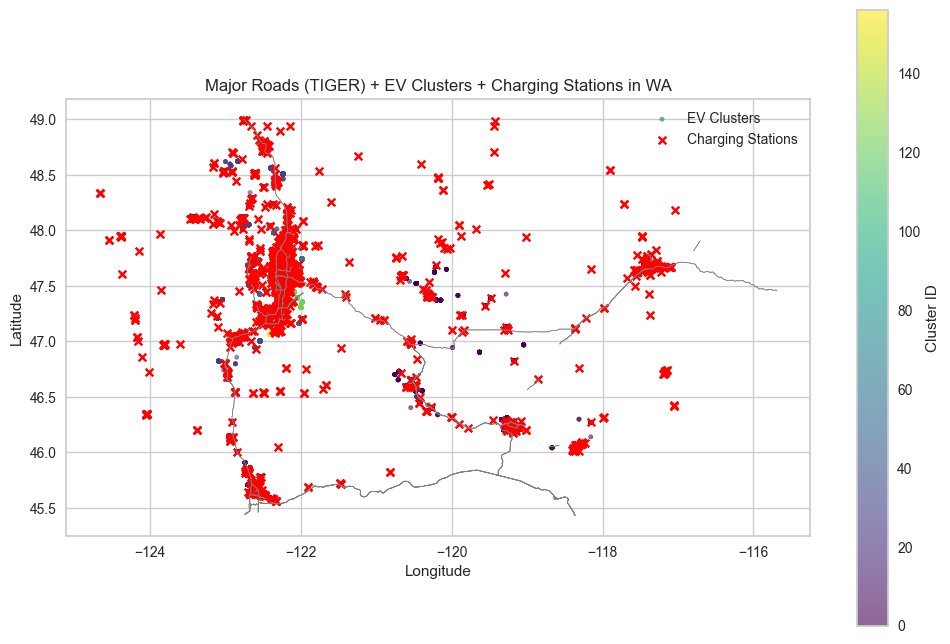

In [139]:
fig, ax = plt.subplots(figsize=(12, 8))

wa_roads_wa.plot(ax=ax, color='gray', linewidth=0.5)

scatter = ax.scatter(
    df_ev_wa_no_noise['Longitude'],
    df_ev_wa_no_noise['Latitude'],
    c=df_ev_wa_no_noise['Cluster_HDBSCAN'],
    cmap='viridis',
    alpha=0.6,
    s=10,
    label='EV Clusters'
)

ax.scatter(
    df_charging['Longitude'],
    df_charging['Latitude'],
    color='red',
    marker='x',
    s=30,
    label='Charging Stations'
)

plt.colorbar(scatter, label="Cluster ID")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Major Roads (TIGER) + EV Clusters + Charging Stations in WA")
plt.legend()
plt.show()

This Plot maps charging stations on Major highways in Washington. Two out of 4 highways have very low density of stations.

# Calculating Nearest Station distance

For each EV location, we calculate the distance to the nearest charging station. We will use this as a metric for our anamoly detection

In [105]:
import numpy as np

ev_coords_rad = np.radians(df_ev[['Latitude', 'Longitude']].values)
stations_coords_rad = np.radians(df_charging[['Latitude', 'Longitude']].values)

In [106]:
from sklearn.neighbors import BallTree

tree = BallTree(stations_coords_rad, metric='haversine')

In [107]:
distances, indices = tree.query(ev_coords_rad, k=1)

df_ev['NearestStationDist_mile'] = (distances[:, 0] * 6371)*0.621

In [108]:
print(df_ev['NearestStationDist_mile'].describe())

count    205831.000000
mean          0.678402
std           0.811409
min           0.016363
25%           0.146198
50%           0.477642
75%           0.928332
max          16.434470
Name: NearestStationDist_mile, dtype: float64


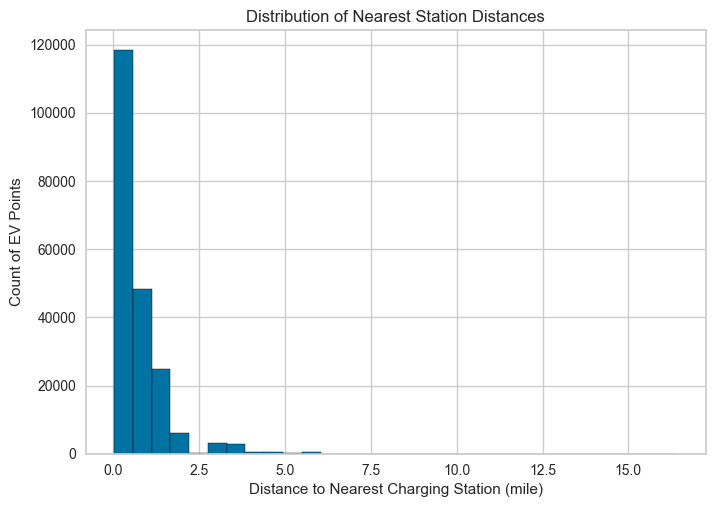

In [109]:
import matplotlib.pyplot as plt
df_ev['NearestStationDist_mile'].hist(bins=30, edgecolor='black')
plt.xlabel("Distance to Nearest Charging Station (mile)")
plt.ylabel("Count of EV Points")
plt.title("Distribution of Nearest Station Distances")
plt.show()

Most of the car owners have a charging station within 2.5 miles of their houses 

In [110]:
cluster_dist = df_ev.groupby('Cluster_HDBSCAN')['NearestStationDist_mile'].mean().sort_values()
print(cluster_dist.head(10))  
print(cluster_dist.tail(10))

Cluster_HDBSCAN
115    0.016363
2      0.023782
94     0.027163
72     0.028843
120    0.046259
51     0.047344
118    0.057441
29     0.060675
135    0.064672
45     0.069895
Name: NearestStationDist_mile, dtype: float64
Cluster_HDBSCAN
139    1.699416
142    1.786747
65     1.902548
19     2.068670
40     2.187997
152    2.199869
123    2.827500
63     3.386165
121    3.601792
122    5.889795
Name: NearestStationDist_mile, dtype: float64


In [111]:
import pandas as pd

df_ev = df_ev[df_ev['Cluster_HDBSCAN'] != -1].copy()

cluster_centroids = df_ev.groupby('Cluster_HDBSCAN')[['Latitude', 'Longitude']].mean().reset_index()
cluster_centroids.columns = ['Cluster', 'Lat_centroid_deg', 'Lon_centroid_deg']

In [112]:
import numpy as np

df_ev['Lat_rad'] = np.radians(df_ev['Latitude'])
df_ev['Lon_rad'] = np.radians(df_ev['Longitude'])

cluster_centroids['Lat_centroid_rad'] = np.radians(cluster_centroids['Lat_centroid_deg'])
cluster_centroids['Lon_centroid_rad'] = np.radians(cluster_centroids['Lon_centroid_deg'])

In [113]:
df_ev_wa_no_noise = pd.merge(
    df_ev,
    cluster_centroids[['Cluster', 'Lat_centroid_rad', 'Lon_centroid_rad']],
    left_on='Cluster_HDBSCAN',
    right_on='Cluster',
    how='left'
)

In [114]:
R = 6371.0

def haversine_dist(lat1, lon1, lat2, lon2):
    """
    Compute haversine distance between two points in radians.
    Returns distance in km.
    """
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = np.sin(dlat/2)**2 + np.cos(lat1)*np.cos(lat2)*np.sin(dlon/2)**2
    c = 2 * np.arcsin(np.sqrt(a))
    return R * c

df_ev_wa_no_noise['Dist_to_Centroid_km'] = df_ev_wa_no_noise.apply(
    lambda row: haversine_dist(
        row['Lat_rad'],
        row['Lon_rad'],
        row['Lat_centroid_rad'],
        row['Lon_centroid_rad']
    ),
    axis=1
)

In [115]:
avg_distances = df_ev_wa_no_noise.groupby('Cluster_HDBSCAN')['Dist_to_Centroid_km'].mean().reset_index()
avg_distances.columns = ['Cluster', 'AvgDistance_km']
avg_distances['AvgDistance_mile']=avg_distances['AvgDistance_km']*.621
print(avg_distances.sort_values(by='AvgDistance_km',ascending=False))

    Cluster  AvgDistance_km  AvgDistance_mile
0         0       37.912325         23.543554
1         1        6.854388          4.256575
32       32        6.108798          3.793564
31       31        5.753518          3.572934
12       12        5.365802          3.332163
..      ...             ...               ...
81       81        0.000000          0.000000
80       80        0.000000          0.000000
79       79        0.000000          0.000000
77       77        0.000000          0.000000
96       96        0.000000          0.000000

[157 rows x 3 columns]


In [116]:
import numpy as np

df_ev_wa_no_noise = df_ev[df_ev['Cluster_HDBSCAN'] != -1].copy()
ev_coords_rad = np.radians(df_ev_wa_no_noise[['Latitude', 'Longitude']].values)
stations_coords_rad = np.radians(df_charging[['Latitude', 'Longitude']].values)

In [117]:
from sklearn.neighbors import BallTree
tree = BallTree(stations_coords_rad, metric='haversine')

In [118]:
distances, indices = tree.query(ev_coords_rad, k=1)

R_earth = 6371.0 
df_ev_wa_no_noise['NearestStationDist_mile'] = (distances[:, 0] * R_earth)*0.621

count    205831.000000
mean          0.678402
std           0.811409
min           0.016363
25%           0.146198
50%           0.477642
75%           0.928332
max          16.434470
Name: NearestStationDist_mile, dtype: float64


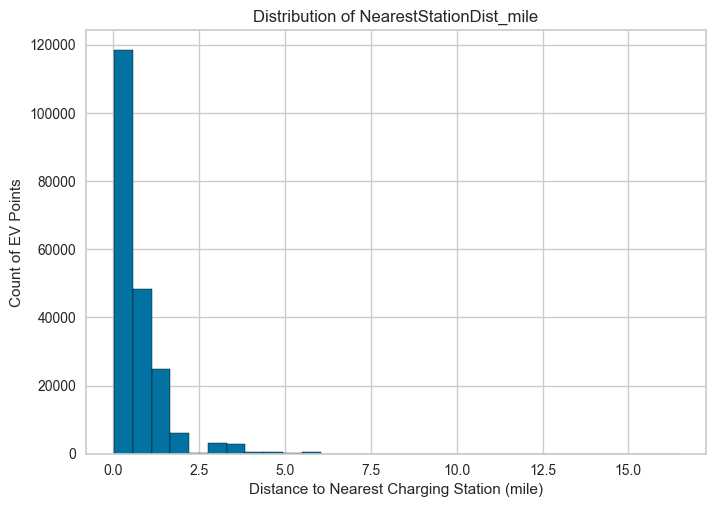

In [120]:
print(df_ev_wa_no_noise['NearestStationDist_mile'].describe())

import matplotlib.pyplot as plt

plt.hist(df_ev_wa_no_noise['NearestStationDist_mile'], bins=30, edgecolor='black')
plt.xlabel("Distance to Nearest Charging Station (mile)")
plt.ylabel("Count of EV Points")
plt.title("Distribution of NearestStationDist_mile")
plt.show()

# Anamoly Detection

## Nearest Station Distance 
We use the previously calculated Nearest Station Distance to identify anamolies

In [140]:
from sklearn.ensemble import IsolationForest
import numpy as np

feature_data = df_ev_wa_no_noise[['NearestStationDist_mile']].values

iso_forest = IsolationForest(
    n_estimators=1000,
    contamination=0.05,  
    random_state=42
)
iso_forest.fit(feature_data)

df_ev_wa_no_noise['StationDist_Anomaly'] = iso_forest.predict(feature_data)

In [141]:
print(df_ev_wa_no_noise['StationDist_Anomaly'].value_counts())

station_dist_outliers = df_ev_wa_no_noise[df_ev_wa_no_noise['StationDist_Anomaly'] == -1]
print("Number of outliers:", station_dist_outliers.shape[0])

print(station_dist_outliers['NearestStationDist_mile'].describe())

StationDist_Anomaly
 1    196358
-1      9473
Name: count, dtype: int64
Number of outliers: 9473
count    9473.000000
mean        3.430869
std         1.335862
min         1.883976
25%         2.827500
50%         3.254747
75%         3.601792
max        16.434470
Name: NearestStationDist_mile, dtype: float64


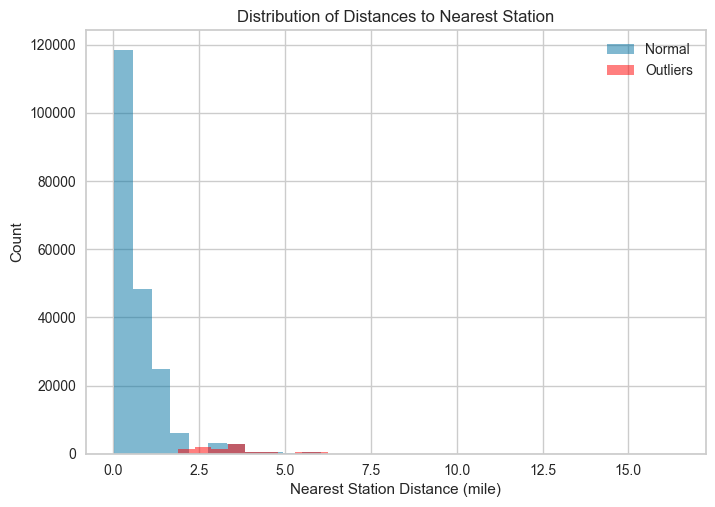

In [142]:
import matplotlib.pyplot as plt

plt.hist(df_ev_wa_no_noise['NearestStationDist_mile'], bins=30, alpha=0.5, label='Normal')
plt.hist(station_dist_outliers['NearestStationDist_mile'], bins=30, alpha=0.5, label='Outliers', color='red')
plt.xlabel("Nearest Station Distance (mile)")
plt.ylabel("Count")
plt.title("Distribution of Distances to Nearest Station")
plt.legend()
plt.show()

Our model detects most of the points with Nearest station Distance >2.5 miles as outliers. This aligns with planning guidelines which recommend that public chargers be positioned so that most residents have access within a short distance—often on the order of 1–2 miles or even within a few blocks in high-density areas.

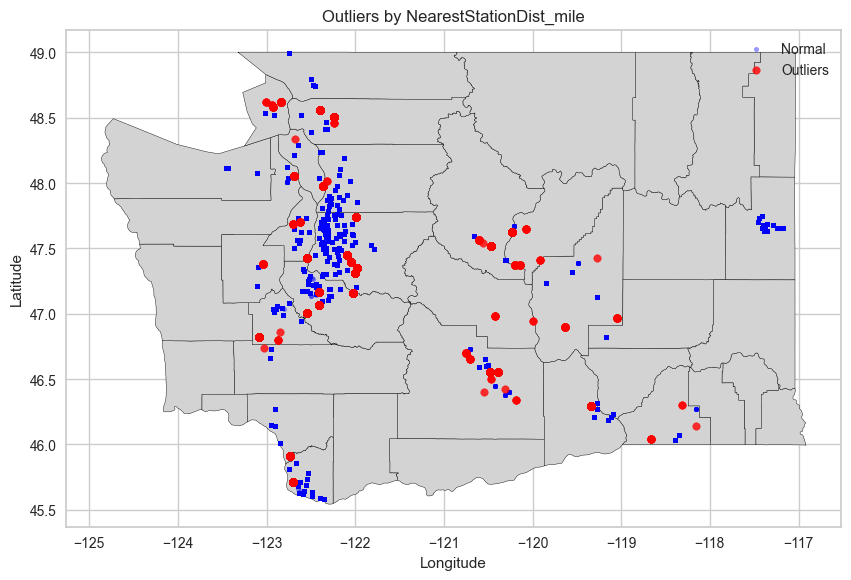

In [143]:
fig, ax = plt.subplots(figsize=(10, 8))
wa.plot(ax=ax, color='lightgrey', edgecolor='black') 

normal_pts = df_ev_wa_no_noise[df_ev_wa_no_noise['StationDist_Anomaly'] == 1]
ax.scatter(
    normal_pts['Longitude'],
    normal_pts['Latitude'],
    c='blue',
    alpha=0.4,
    s=10,
    label='Normal'
)

outlier_pts = station_dist_outliers
ax.scatter(
    outlier_pts['Longitude'],
    outlier_pts['Latitude'],
    c='red',
    alpha=0.8,
    s=30,
    label='Outliers'
)

plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Outliers by NearestStationDist_mile")
plt.legend()
plt.show()

This map showcases many outlier points in the densely populated city of Seattle

In [144]:
anomaly_summary = df_ev_wa_no_noise.groupby('Cluster_HDBSCAN')['StationDist_Anomaly'].value_counts().unstack(fill_value=0)
anomaly_summary['TotalPoints'] = anomaly_summary[-1] + anomaly_summary[1]
anomaly_summary['OutlierRatio'] = anomaly_summary[-1] / anomaly_summary['TotalPoints']

anomaly_summary.sort_values('OutlierRatio', ascending=False, inplace=True)
print(anomaly_summary.head(10))

StationDist_Anomaly    -1    1  TotalPoints  OutlierRatio
Cluster_HDBSCAN                                          
63                    728    0          728      1.000000
19                   1002    0         1002      1.000000
121                  1895    0         1895      1.000000
122                   597    0          597      1.000000
123                  1587    0         1587      1.000000
152                   552  186          738      0.747967
147                   365  301          666      0.548048
48                    277  306          583      0.475129
59                    319  428          747      0.427041
40                    164  388          552      0.297101


There are 5 Clusters which outlier ratio fo 100% which means all of the points in cluster have a high nearest station distance.

In [145]:
print(wa_roads.columns)

Index(['LINEARID', 'FULLNAME', 'RTTYP', 'MTFCC', 'geometry'], dtype='object')


In [146]:
wa_roads["MTFCC"].value_counts()

MTFCC
S1100    17522
Name: count, dtype: int64

In [147]:
# Example: roads is in EPSG:4269, EV data is in EPSG:4326
# Convert roads to EPSG:4326
wa_roads = wa_roads.to_crs(epsg=4326)

# Now roads.crs == gdf_ev.crs == EPSG:4326

In [148]:
# minx, maxx = -125, -116
# miny, maxy = 45.5, 49.5
wa_roads = wa_roads.cx[-125:-116, 45.5:49.5]

In [149]:
wa_roads.shape

(298, 5)

In [150]:
import geopandas as gpd
from shapely.geometry import Point

gdf_charging = gpd.GeoDataFrame(
    df_charging,
    geometry=gpd.points_from_xy(df_charging['Longitude'], df_charging['Latitude']),
    crs="EPSG:4326"  # WGS84 lat/lon
)

In [151]:
print(wa_roads.crs)

EPSG:4326


In [152]:
print(gdf_charging.crs)

EPSG:4326


## Now we use Cars/Station ratio in at cluster level to identifiy anamolies.

In [153]:
import pandas as pd

df_ev_wa_no_noise = df_ev_wa_no_noise[df_ev_wa_no_noise['Cluster_HDBSCAN'] != -1].copy()

cluster_centroids = df_ev_wa_no_noise.groupby('Cluster_HDBSCAN')[['Latitude','Longitude']].mean().reset_index()
cluster_centroids.columns = ['Cluster', 'Lat_centroid', 'Lon_centroid']

In [154]:
import numpy as np

def find_nearest_cluster(row):
    dists = ((cluster_centroids['Lat_centroid'] - row['Latitude'])**2 + 
             (cluster_centroids['Lon_centroid'] - row['Longitude'])**2)**0.5
    return cluster_centroids.loc[dists.idxmin(), 'Cluster']

df_charging['Cluster_HDBSCAN'] = df_charging.apply(find_nearest_cluster, axis=1)

In [155]:
import pandas as pd

df_charging = df_charging.reset_index()  
df_charging.rename(columns={'index': 'Station_ID'}, inplace=True)

print("After reset index, df_charging columns:", df_charging.columns)
station_count = df_charging.groupby('Cluster_HDBSCAN')['Station_ID'].count().reset_index()
station_count.rename(columns={'Station_ID': 'num_stations'}, inplace=True)

print("Station Count Data:\n", station_count.head())

ev_count = df_ev_wa_no_noise.groupby('Cluster_HDBSCAN')['VIN (1-10)'].count().reset_index()
ev_count.rename(columns={'VIN (1-10)': 'num_ev'}, inplace=True)

print("EV Count Data:\n", ev_count.head())

cluster_data = ev_count.merge(station_count, on='Cluster_HDBSCAN', how='left')


cluster_data['num_stations'].fillna(0, inplace=True)
cluster_data = cluster_data.loc[:, ~cluster_data.columns.duplicated()].copy()

print(cluster_data.columns)
cluster_data['Cars/station'] =  cluster_data['num_ev']/cluster_data['num_stations']

print("Final Cluster Data:\n", cluster_data)

After reset index, df_charging columns: Index(['Station_ID', 'Fuel Type Code', 'Station Name', 'Street Address',
       'City', 'State', 'ZIP', 'Latitude', 'Longitude', 'EV Connector Types',
       'NearestCluster', 'Cluster_HDBSCAN'],
      dtype='object')
Station Count Data:
    Cluster_HDBSCAN  num_stations
0                0            73
1                1            55
2                2             3
3                3            18
4                4            30
EV Count Data:
    Cluster_HDBSCAN  num_ev
0                0    2351
1                1    1259
2                2    1992
3                3     726
4                4     587
Index(['Cluster_HDBSCAN', 'num_ev', 'num_stations'], dtype='object')
Final Cluster Data:
      Cluster_HDBSCAN  num_ev  num_stations  Cars/station
0                  0    2351          73.0     32.205479
1                  1    1259          55.0     22.890909
2                  2    1992           3.0    664.000000
3                  3     72

/var/folders/41/fn2nh3311kv7rct8106znjt40000gn/T/ipykernel_2976/2769365073.py:27: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  cluster_data['num_stations'].fillna(0, inplace=True)


In [159]:
import numpy as np

cluster_data['Cars/station'] = cluster_data['Cars/station'].replace([np.inf, -np.inf], np.nan)

cluster_data = cluster_data.dropna(subset=['Cars/station'])

print(cluster_data['Cars/station'].describe())

count     151.000000
mean      300.081678
std       516.656531
min         3.283784
25%        63.761538
50%       122.666667
75%       306.000000
max      4209.000000
Name: Cars/station, dtype: float64


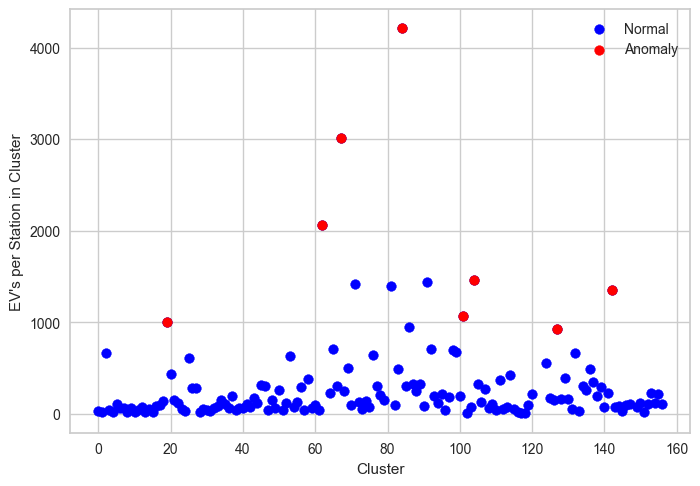

In [160]:
iso_forest = IsolationForest(contamination=0.05)
cluster_data['anomaly'] = iso_forest.fit_predict(cluster_data[['Cars/station']])

anomalies = cluster_data[cluster_data['anomaly'] == -1]
plt.scatter(cluster_data['Cluster_HDBSCAN'], cluster_data['Cars/station'], color='blue', label='Normal')
plt.scatter(anomalies['Cluster_HDBSCAN'], anomalies['Cars/station'], color='red', label='Anomaly')
plt.xlabel("Cluster")
plt.ylabel("EV's per Station in Cluster")
plt.legend()
plt.show()

The anomalous clusters exhibit much higher EV-to-station ratios, suggesting potential charging bottlenecks or underserved areas.